In [1]:
import numpy as np
import pandas as pd
from transformers import BertModel
from keybert import KeyBERT
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
from konlpy.tag import Okt
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

C:\Users\mink5\anaconda3\Lib\site-packages\transformers\utils\generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
C:\Users\mink5\anaconda3\Lib\site-packages\transformers\utils\generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [2]:
font_path = "C:/Users/mink5/Desktop/석사과정/2학기/다변량통계방법론/기말 프로젝트/nanum-all/나눔 글꼴/나눔고딕/NanumFontSetup_TTF_GOTHIC/NanumGothic.ttf"
fontprop = FontProperties(fname=font_path)

In [10]:
final_data_key = pd.read_json("final_data_key.json", orient='records')
final_data_key

,source,market,date,title,content,hashtags,revisit,reply,sentiment,content_length,content_keywords
0,민원,자양전통시장,20220608,자양전통시장 주차장의 안일한 운영,저는 2022년 5월 24일 13시 7분 자양전통시장 이용을 위해 자양전통시장 주차...,0,0,0,0,1908,"[할인, 결제, 지급, 주차장, 대가]"
1,민원,자양전통시장,20210312,자양전통시장 주차장,안녕하십니까 담당자님 자양전통시장을 자주 이용하는데 이번에 주차장을 이용하면서 불편...,0,0,0,0,1031,"[결제, 할인, 무료, 현금, 차로]"
2,민원,자양전통시장,20200622,청년몰을 조성해주세요!,청년 실업문제와 전통시장 부흥을 위해 화양시장 혹은 자양전통시장에 청년몰을 조성해주...,0,0,0,1,422,"[젊다, 상점가, 창업, 상인, 청년]"
3,민원,자양전통시장,20200520,자양 1동 새벽 도로공사 민원 신청합니다.,안녕하세요. 자양 1동 주민입니다. 최근 자양전통시장으로 진입하는 골목의 도로를 공...,0,0,0,0,446,"[잠들다, 퇴근, 주민, 새벽, 씻다]"
4,민원,망원시장,20231012,망원시장 공영주차장 부당이득은 1년넘게 방치하고 주차요금은 50퍼센트 인상,첨부와 같이 2022년 06월 18일 망원시장 공영주차장의 시장할인 제도의 불합리한...,0,0,0,0,769,"[주차장, 주차, 할인, 요금, 부당이득]"
...,...,...,...,...,...,...,...,...,...,...,...
8115,놀장어플리뷰,망원시장,20190228,None,좋아요,None,None,None,2,3,[]
8116,놀장어플리뷰,망원시장,20180913,None,좋아요,None,None,None,2,3,[]
8117,놀장어플리뷰,망원시장,20180918,None,좋아요,None,None,None,2,3,[]
8118,놀장어플리뷰,망원시장,20211213,None,좋음,None,None,None,2,2,[]


In [11]:
final_data_key = final_data_key[final_data_key['source']!='놀장어플리뷰']
final_data_key = final_data_key[final_data_key['source']!='광진땡겨요어플리뷰']
final_data_key

,source,market,date,title,content,hashtags,revisit,reply,sentiment,content_length,content_keywords
0,민원,자양전통시장,20220608,자양전통시장 주차장의 안일한 운영,저는 2022년 5월 24일 13시 7분 자양전통시장 이용을 위해 자양전통시장 주차...,0,0,0,0,1908,"[할인, 결제, 지급, 주차장, 대가]"
1,민원,자양전통시장,20210312,자양전통시장 주차장,안녕하십니까 담당자님 자양전통시장을 자주 이용하는데 이번에 주차장을 이용하면서 불편...,0,0,0,0,1031,"[결제, 할인, 무료, 현금, 차로]"
2,민원,자양전통시장,20200622,청년몰을 조성해주세요!,청년 실업문제와 전통시장 부흥을 위해 화양시장 혹은 자양전통시장에 청년몰을 조성해주...,0,0,0,1,422,"[젊다, 상점가, 창업, 상인, 청년]"
3,민원,자양전통시장,20200520,자양 1동 새벽 도로공사 민원 신청합니다.,안녕하세요. 자양 1동 주민입니다. 최근 자양전통시장으로 진입하는 골목의 도로를 공...,0,0,0,0,446,"[잠들다, 퇴근, 주민, 새벽, 씻다]"
4,민원,망원시장,20231012,망원시장 공영주차장 부당이득은 1년넘게 방치하고 주차요금은 50퍼센트 인상,첨부와 같이 2022년 06월 18일 망원시장 공영주차장의 시장할인 제도의 불합리한...,0,0,0,0,769,"[주차장, 주차, 할인, 요금, 부당이득]"
...,...,...,...,...,...,...,...,...,...,...,...
7796,인스타그램,망원시장,20240316,0,화창한 봄기운 가득한 토요일요기요거 활짝 열었습니다봄이 성큼 다가왔어요오늘은 요기요...,"[#망원시장, #망원동맛집, #비건그릭요거트맛집, #그릭요거트맛집, #망리단길맛집,...",0,0,2,283,"[다가오다, 거도, 오비다, 달다, 열다]"
7797,인스타그램,망원시장,20231027,0,알록달록한 무지개 같은 닭강정을 파는 곳이다.망원시장에 방문하면 무조건 방문해야하기...,"[#망원동맛집, #망원시장, #마포구맛집, #망원역맛집, #닭강정맛집, #망원시장맛집]",0,0,2,472,"[입맛, 맛집, 식감, 닭다리, 먹기]"
7798,인스타그램,망원시장,20230920,0,나처럼 훈훈한 사람들만 방문해야 하는 곳이 있다.서울 마포구 망원역 망원시장 근처에...,"[#훈훈호떡, #먹세권_마포구, #먹세권_망원역]",0,0,1,358,"[연락처, 포은로, 지하, 오레오, 서두르다]"
7799,인스타그램,망원시장,20231211,0,망원시장 같이 갈 친구 태그 !!#재슐랭망원 #망원시장 #망원시장투어근처 들를 일이...,"[#재슐랭_망원, #망원시장, #망원시장투어, #우이락, #재슐랭가이드, #재슐랭,...",0,0,2,330,"[워스트, 모르다, 마요, 먹고다, 맛있다]"


In [12]:
sentiment_0_key = final_data_key[final_data_key['sentiment'] == 0]
sentiment_1_key = final_data_key[final_data_key['sentiment'] == 1]
sentiment_2_key = final_data_key[final_data_key['sentiment'] == 2]
sentiment_0_key = sentiment_0_key.reset_index(drop = True)
sentiment_1_key = sentiment_1_key.reset_index(drop = True)
sentiment_2_key = sentiment_2_key.reset_index(drop = True)

In [13]:
mangwon0 = sentiment_0_key[sentiment_0_key['market']=='망원시장']
mangwon1 = sentiment_1_key[sentiment_1_key['market']=='망원시장']
mangwon2 = sentiment_2_key[sentiment_2_key['market']=='망원시장']

jayang0 = sentiment_0_key[sentiment_0_key['market']=='자양전통시장']
jayang1 = sentiment_1_key[sentiment_1_key['market']=='자양전통시장']
jayang2 = sentiment_2_key[sentiment_2_key['market']=='자양전통시장']

# 키워드 워드클라우드

## 망원시장

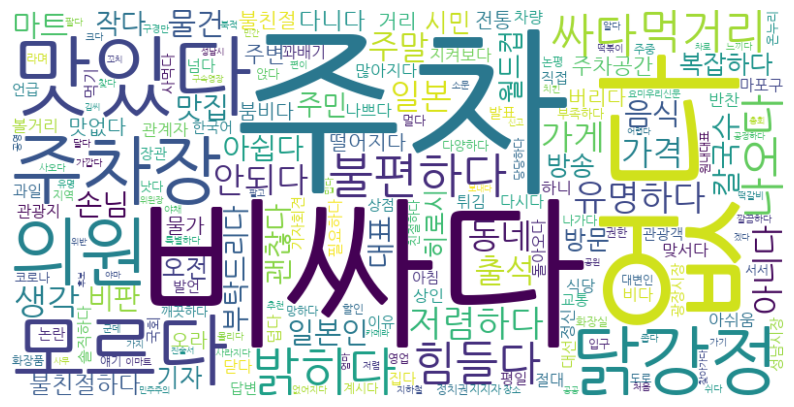

In [14]:
font_path = "C:/Users/mink5/Desktop/석사과정/2학기/다변량통계방법론/기말 프로젝트/nanum-all/나눔 글꼴/나눔고딕/NanumFontSetup_TTF_GOTHIC/NanumGothic.ttf"
all_keywords_m0 = [keyword for keywords_list in mangwon0['content_keywords'] for keyword in keywords_list]
word_freq_m0 = Counter(all_keywords_m0) # 빈도수 계산
wordcloud_m0 = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate_from_frequencies(word_freq_m0)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_m0, interpolation='bilinear')
plt.axis('off')
plt.show()

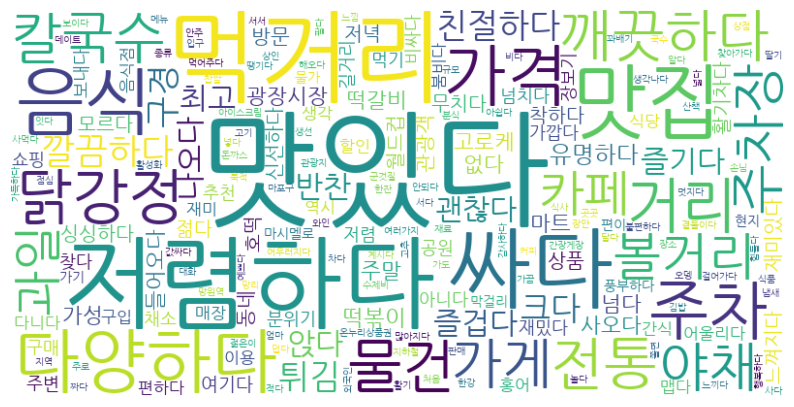

In [15]:
all_keywords_m2 = [keyword for keywords_list in mangwon2['content_keywords'] for keyword in keywords_list]
word_freq_m2 = Counter(all_keywords_m2) # 빈도수 계산
wordcloud_m2 = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate_from_frequencies(word_freq_m2)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_m2, interpolation='bilinear')
plt.axis('off')
plt.show()

## 자양시장

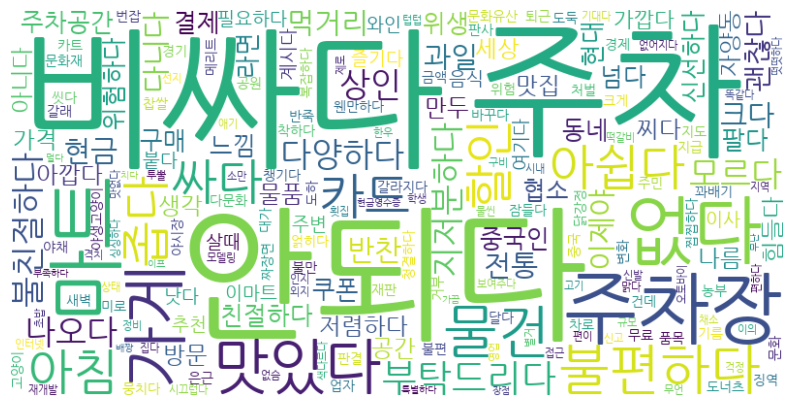

In [16]:
all_keywords_j0 = [keyword for keywords_list in jayang0['content_keywords'] for keyword in keywords_list]
word_freq_j0 = Counter(all_keywords_j0) # 빈도수 계산
wordcloud_j0 = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate_from_frequencies(word_freq_j0)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_j0, interpolation='bilinear')
plt.axis('off')
plt.show()

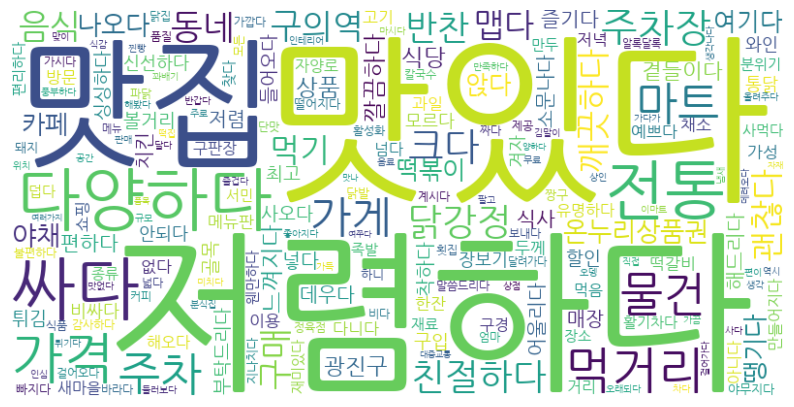

In [17]:
all_keywords_j2 = [keyword for keywords_list in jayang2['content_keywords'] for keyword in keywords_list]
word_freq_j2 = Counter(all_keywords_j2) # 빈도수 계산
wordcloud_j2 = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate_from_frequencies(word_freq_j2)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_j2, interpolation='bilinear')
plt.axis('off')
plt.show()

# 키워드 네트워크

## 망원시장

In [18]:
all_keywords_m2 = [keyword for keywords_list in mangwon2['content_keywords'] for keyword in keywords_list]
word_freq_m2 = Counter(all_keywords_m2) # 빈도수 계산
for keyword, freq in word_freq_m2.most_common():
    print(f"{keyword}: {freq}")

맛있다: 507
먹거리: 292
저렴하다: 291
싸다: 220
맛집: 187
음식: 147
다양하다: 139
가격: 122
주차: 110
닭강정: 100
거리: 97
물건: 91
전통: 89
깨끗하다: 85
칼국수: 83
가게: 80
주차장: 80
야채: 77
볼거리: 77
카페: 70
과일: 69
깔끔하다: 62
구경: 60
친절하다: 58
튀김: 58
크다: 56
즐기다: 50
즐겁다: 49
나오다: 49
앉다: 49
최고: 48
반찬: 47
괜찮다: 47
유명하다: 46
떡볶이: 44
떡갈비: 42
넘다: 42
사오다: 42
마트: 41
없다: 41
가성: 40
광장시장: 39
고로케: 39
주말: 38
들어오다: 38
방문: 36
관광객: 36
싱싱하다: 34
착하다: 33
재미있다: 33
저녁: 32
활기차다: 31
무치다: 31
젊다: 30
느껴지다: 29
동네: 29
상품: 29
호떡: 29
신선하다: 29
월드컵: 29
모르다: 28
여기다: 28
재밌다: 28
주변: 28
가깝다: 27
분위기: 26
추천: 26
먹기: 26
공원: 25
찾다: 25
쇼핑: 24
구매: 24
채소: 24
넘치다: 24
저렴: 23
비싸다: 23
장보기: 23
보내다: 22
아니다: 22
길거리: 22
어울리다: 22
음식점: 22
맵다: 22
붐비다: 21
생각: 21
식당: 21
간식: 21
편하다: 21
역시: 21
홍어: 21
재미: 20
할인: 20
다니다: 19
매장: 19
이용: 19
구입: 18
풍부하다: 18
마시멜로: 18
편이: 18
물가: 18
막걸리: 18
현지: 17
가기: 17
아이스크림: 17
식사: 17
장소: 17
알다: 17
종류: 17
돈까스: 17
냄새: 17
곁들이다: 16
고추: 16
안되다: 16
찾아가다: 16
많아지다: 16
활기: 16
어우러지다: 16
쫄면: 16
생각나다: 16
온누리상품권: 15
고기: 15
사먹다: 15
생선: 15
북적: 15
팔다: 15
수제비: 15
예쁘다: 15
한강: 15
상인: 1

In [19]:
all_keywords_m0 = [keyword for keywords_list in mangwon0['content_keywords'] for keyword in keywords_list]
word_freq_m0 = Counter(all_keywords_m0) # 빈도수 계산
for keyword, freq in word_freq_m0.most_common():
    print(f"{keyword}: {freq}")

주차: 57
비싸다: 46
없다: 41
맛있다: 33
모르다: 26
주차장: 25
닭강정: 25
의원: 25
밝히다: 25
불편하다: 23
싸다: 21
힘들다: 21
먹거리: 21
나오다: 20
저렴하다: 20
생각: 19
유명하다: 19
안되다: 18
동네: 18
가게: 18
가격: 17
일본: 17
아니다: 16
주말: 16
출석: 16
마트: 14
음식: 14
물건: 14
칼국수: 14
일본인: 13
아쉽다: 13
맛집: 13
괜찮다: 13
손님: 13
비판: 12
대표: 12
부탁드리다: 11
주민: 11
작다: 11
월드컵: 10
방송: 10
복잡하다: 10
방문: 9
시민: 9
기자: 9
오전: 9
히로시: 9
다니다: 9
불친절하다: 9
주차공간: 8
주변: 8
떨어지다: 8
물가: 8
거리: 8
불친절: 8
맛없다: 8
버리다: 8
전통: 7
붐비다: 7
오라: 7
지켜보다: 7
맞서다: 7
하니: 7
관계자: 7
많아지다: 7
비다: 7
볼거리: 7
나쁘다: 7
아쉬움: 7
정신: 7
상인: 7
먹기: 7
반찬: 7
마포구: 6
차량: 6
대선: 6
닫다: 6
넘다: 6
식당: 6
튀김: 6
돌아오다: 6
다시다: 6
절대: 6
필요하다: 6
솔직하다: 6
관광지: 6
꽈배기: 6
과일: 6
덥다: 6
교통: 5
이유: 5
집다: 5
장관: 5
발언: 5
상점: 5
직접: 5
사먹다: 5
발표: 5
답변: 5
언급: 5
국회: 5
평일: 5
논란: 5
기자회견: 5
성남시장: 5
아침: 5
광장시장: 5
한국어: 5
관광객: 5
깨끗하다: 5
온누리: 5
부족하다: 5
앉다: 5
멀다: 5
서서: 5
나가다: 5
코로나: 5
다양하다: 5
낫다: 5
친절하다: 5
계시다: 5
할인: 4
지역: 4
얘기: 4
도로: 4
화장실: 4
입구: 4
영업: 4
정치권: 4
화장품: 4
망하다: 4
주중: 4
원내대표: 4
논평: 4
당당하다: 4
대변인: 4
라며: 4
지지자: 4
권한: 4
요미우리신문: 4
이마트: 4
야채: 4
소문: 4
느끼다: 

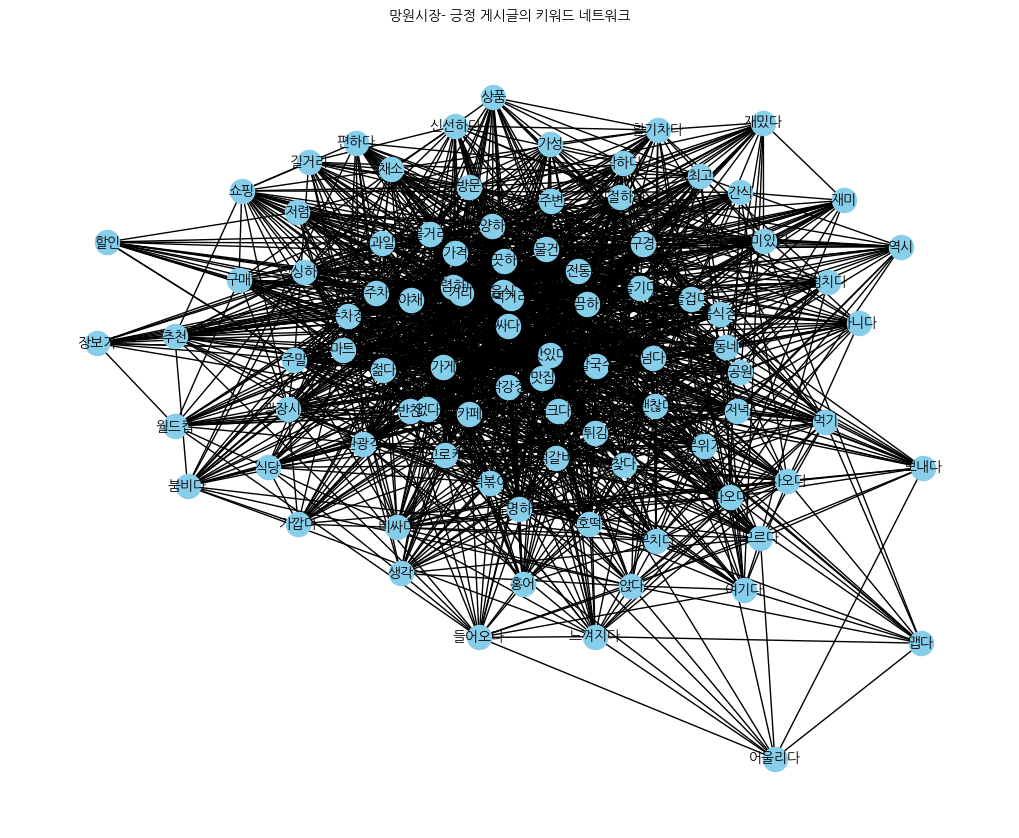

In [20]:
# 20번 이상 나온 키워드만 네트워크 생성
keywords_m2 = [keyword for keyword, freq in word_freq_m2.items() if freq >= 20]

G = nx.Graph()

for keywords_list in mangwon2['content_keywords']:
    for keyword1 in keywords_list:
        if keyword1 in keywords_m2:
            for keyword2 in keywords_list:
                if keyword2 in keywords_m2 and keyword1 != keyword2:
                    if G.has_edge(keyword1, keyword2):
                        G[keyword1][keyword2]['weight'] += 1
                    else:
                        G.add_edge(keyword1, keyword2, weight=1)

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G) 
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=300, edge_color='black', linewidths=1, font_size=10, font_family='NanumGothic')
plt.title('망원시장- 긍정 게시글의 키워드 네트워크', fontproperties=fontprop)
plt.show()

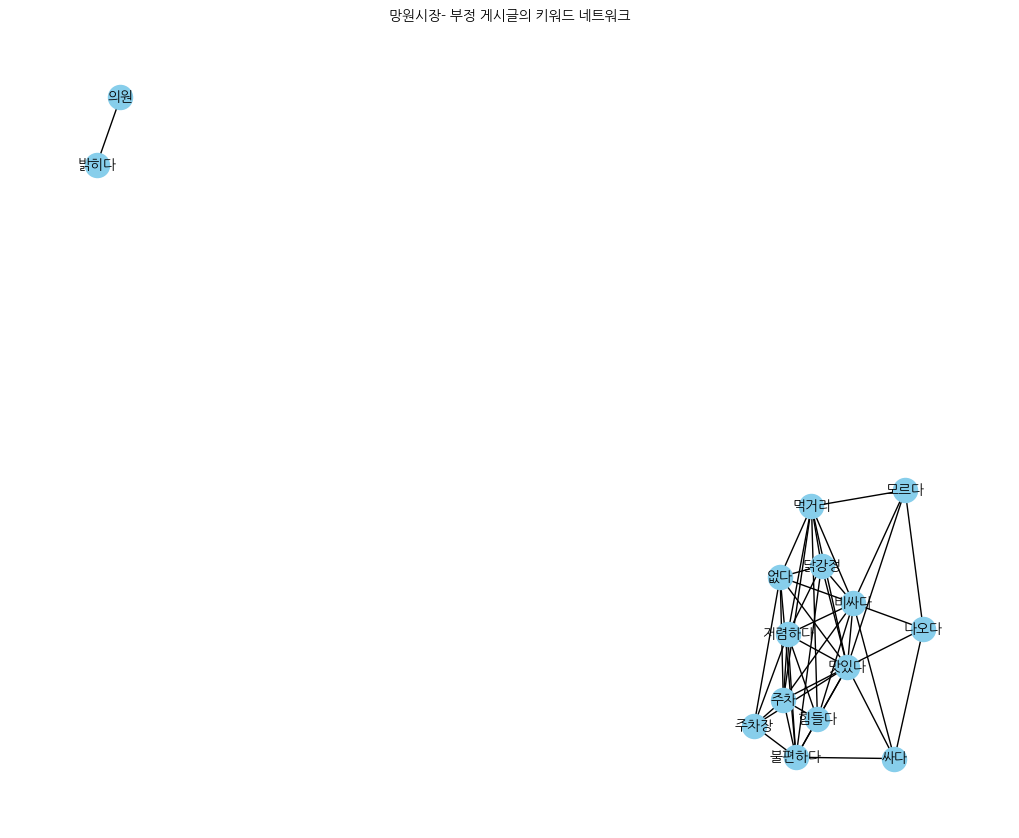

In [21]:
# 20번 이상 나온 키워드만 네트워크 생성
keywords_m0 = [keyword for keyword, freq in word_freq_m0.items() if freq >= 20]

G = nx.Graph()

for keywords_list in mangwon0['content_keywords']:
    for keyword1 in keywords_list:
        if keyword1 in keywords_m0:
            for keyword2 in keywords_list:
                if keyword2 in keywords_m0 and keyword1 != keyword2:
                    if G.has_edge(keyword1, keyword2):
                        G[keyword1][keyword2]['weight'] += 1
                    else:
                        G.add_edge(keyword1, keyword2, weight=1)

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G) 
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=300, edge_color='black', linewidths=1, font_size=10, font_family='NanumGothic')
plt.title('망원시장- 부정 게시글의 키워드 네트워크', fontproperties=fontprop)
plt.show()

## 자양시장

In [22]:
all_keywords_j2 = [keyword for keywords_list in jayang2['content_keywords'] for keyword in keywords_list]
word_freq_j2 = Counter(all_keywords_j2) # 빈도수 계산
for keyword, freq in word_freq_j2.most_common():
    print(f"{keyword}: {freq}")

맛있다: 122
저렴하다: 112
맛집: 68
다양하다: 64
싸다: 64
전통: 59
가격: 57
먹거리: 46
물건: 38
마트: 37
주차: 37
가게: 35
주차장: 28
크다: 26
닭강정: 25
친절하다: 24
동네: 21
반찬: 21
구매: 20
구의역: 20
음식: 20
괜찮다: 20
깨끗하다: 20
맵다: 19
먹기: 19
온누리상품권: 18
야채: 18
나오다: 18
떡볶이: 17
땡기다: 17
카페: 17
여기다: 16
앉다: 16
상품: 15
깔끔하다: 15
식당: 15
느껴지다: 15
광진구: 14
곁들이다: 13
편하다: 12
즐기다: 12
식사: 12
해드리다: 12
치킨: 11
저렴: 11
소문나다: 11
매장: 11
착하다: 11
넣다: 11
데우다: 11
어울리다: 11
할인: 10
골목: 10
구입: 10
싱싱하다: 10
들어오다: 10
볼거리: 10
최고: 10
튀김: 10
사오다: 10
부탁드리다: 10
비싸다: 9
장보기: 9
신선하다: 9
안되다: 9
모르다: 9
통닭: 9
와인: 9
겨자: 9
없다: 8
쇼핑: 8
채소: 8
떡갈비: 8
과일: 8
가성: 8
이용: 8
다니다: 8
한잔: 8
방문: 8
고기: 8
저녁: 8
두께: 8
예쁘다: 8
메뉴판: 8
구판장: 7
아니다: 7
유명하다: 7
넘다: 7
구경: 7
거리: 7
해오다: 7
새마을: 7
자양로: 7
만들어지다: 7
먹음: 7
활기차다: 6
종류: 6
사먹다: 6
덥다: 6
재료: 6
분위기: 6
서민: 6
편리하다: 6
족발: 6
찾다: 6
장소: 6
만두: 6
재미있다: 6
웬만하다: 6
야무지다: 6
떨어지다: 6
하니: 6
돼지: 6
빠지다: 6
지나치다: 6
닭발: 6
짱구: 6
식품: 5
불편하다: 5
모든: 5
품질: 5
활성화: 5
비다: 5
가깝다: 5
횟집: 5
칼국수: 5
넓다: 5
가시다: 5
감사하다: 5
커피: 5
단맛: 5
말씀드리다: 5
걸어오다: 5
바라다: 5
보내다: 5
닭집: 5
제공: 5
정육점: 5
엄마: 5
계시

In [23]:
all_keywords_j0 = [keyword for keywords_list in jayang0['content_keywords'] for keyword in keywords_list]
word_freq_j0 = Counter(all_keywords_j0) # 빈도수 계산
for keyword, freq in word_freq_j0.most_common():
    print(f"{keyword}: {freq}")

비싸다: 13
안되다: 12
주차: 12
주차장: 10
마트: 10
없다: 9
가게: 7
맛있다: 7
물건: 6
불편하다: 6
할인: 5
아쉽다: 5
싸다: 5
카드: 5
좁다: 5
아침: 5
부탁드리다: 5
상인: 4
다양하다: 4
불친절하다: 4
지저분하다: 4
모르다: 4
나오다: 4
현금: 3
전통: 3
먹거리: 3
과일: 3
크다: 3
괜찮다: 3
다니다: 3
이제야: 3
반찬: 3
결제: 2
동네: 2
친절하다: 2
현대: 2
넘다: 2
느낌: 2
주차공간: 2
협소: 2
위생: 2
쿠폰: 2
중국인: 2
신선하다: 2
구매: 2
위험하다: 2
라면: 2
팔다: 2
저렴하다: 2
방문: 2
아깝다: 2
물품: 2
가격: 2
아니다: 2
나름: 2
찌다: 2
만두: 2
맛집: 2
공간: 2
생각: 2
힘들다: 2
자양동: 2
세상: 2
가깝다: 2
필요하다: 2
낫다: 2
음식: 2
즐기다: 2
와인: 2
이마트: 2
추천: 2
여기다: 2
살때: 2
계시다: 2
주변: 2
이사: 2
붙다: 2
지급: 1
대가: 1
무료: 1
차로: 1
잠들다: 1
퇴근: 1
주민: 1
새벽: 1
씻다: 1
문화유산: 1
문화재: 1
문화: 1
다문화: 1
공원: 1
판사: 1
징역: 1
재판: 1
판결: 1
처벌: 1
거부: 1
카트: 1
은근: 1
달다: 1
꽈배기: 1
찹쌀: 1
반죽: 1
도너츠: 1
뭉치다: 1
웬만하다: 1
미로: 1
얽히다: 1
불만: 1
업자: 1
갈라지다: 1
갈래: 1
농부: 1
야채: 1
착하다: 1
품목: 1
경기: 1
크게: 1
메리트: 1
지도: 1
번잡: 1
도둑: 1
복잡하다: 1
청결하다: 1
불편: 1
변화: 1
위험: 1
경제: 1
바꾸다: 1
야시장: 1
닭강정: 1
도하: 1
기름: 1
야생고양이: 1
고양이: 1
챙기다: 1
금액: 1
중국: 1
짜장면: 1
건데: 1
찝찝하다: 1
없어지다: 1
시끄럽다: 1
보여주다: 1
시내: 1
재개발: 1
모델링: 1
접근: 1
지역: 1
제로: 1
무언: 1
학생: 1

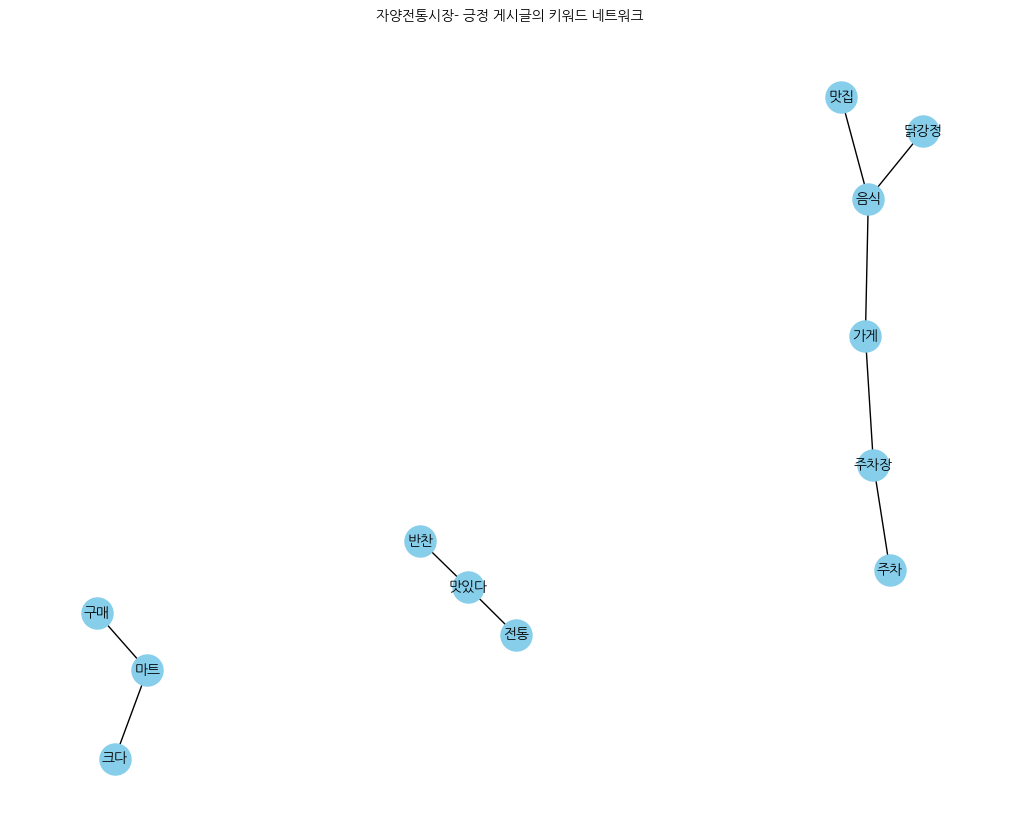

In [24]:
# 20번 이상 나온 키워드만 네트워크 생성
keywords_j2 = [keyword for keyword, freq in word_freq_j2.items() if freq >= 20]

G = nx.Graph()

for keywords_list in jayang1['content_keywords']:
    for keyword1 in keywords_list:
        if keyword1 in keywords_j2:
            for keyword2 in keywords_list:
                if keyword2 in keywords_j2 and keyword1 != keyword2:
                    if G.has_edge(keyword1, keyword2):
                        G[keyword1][keyword2]['weight'] += 1
                    else:
                        G.add_edge(keyword1, keyword2, weight=1)

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G) 
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=500, edge_color='black', linewidths=1, font_size=10, font_family='NanumGothic')
plt.title('자양전통시장- 긍정 게시글의 키워드 네트워크', fontproperties=fontprop)
plt.show()

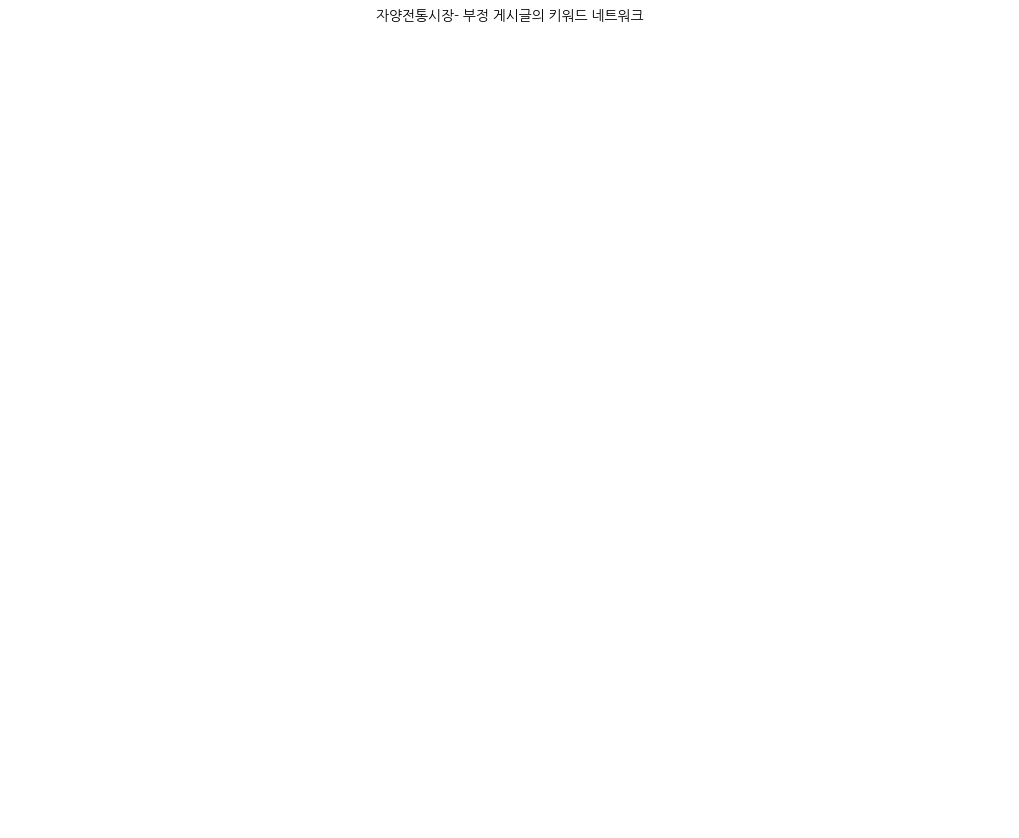

In [25]:
# 20번 이상 나온 키워드만 네트워크 생성
keywords_j0 = [keyword for keyword, freq in word_freq_j0.items() if freq >= 20]

G = nx.Graph()

for keywords_list in jayang0['content_keywords']:
    for keyword1 in keywords_list:
        if keyword1 in keywords_j0:
            for keyword2 in keywords_list:
                if keyword2 in keywords_j0 and keyword1 != keyword2:
                    if G.has_edge(keyword1, keyword2):
                        G[keyword1][keyword2]['weight'] += 1
                    else:
                        G.add_edge(keyword1, keyword2, weight=1)

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G) 
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=500, edge_color='black', linewidths=1, font_size=10, font_family='NanumGothic')
plt.title('자양전통시장- 부정 게시글의 키워드 네트워크', fontproperties=fontprop)
plt.show()

## Ego network

- '키워드 네트워크 분석(keyword network analysis)을 통한 국내 코칭 연구 동향 분석' 논문 참고
- 연결 중심성이 높은 주요 핵심어를 중심으로 생성
- 각 row의 키워드 리스트에서 핵심어가 있는지 파악

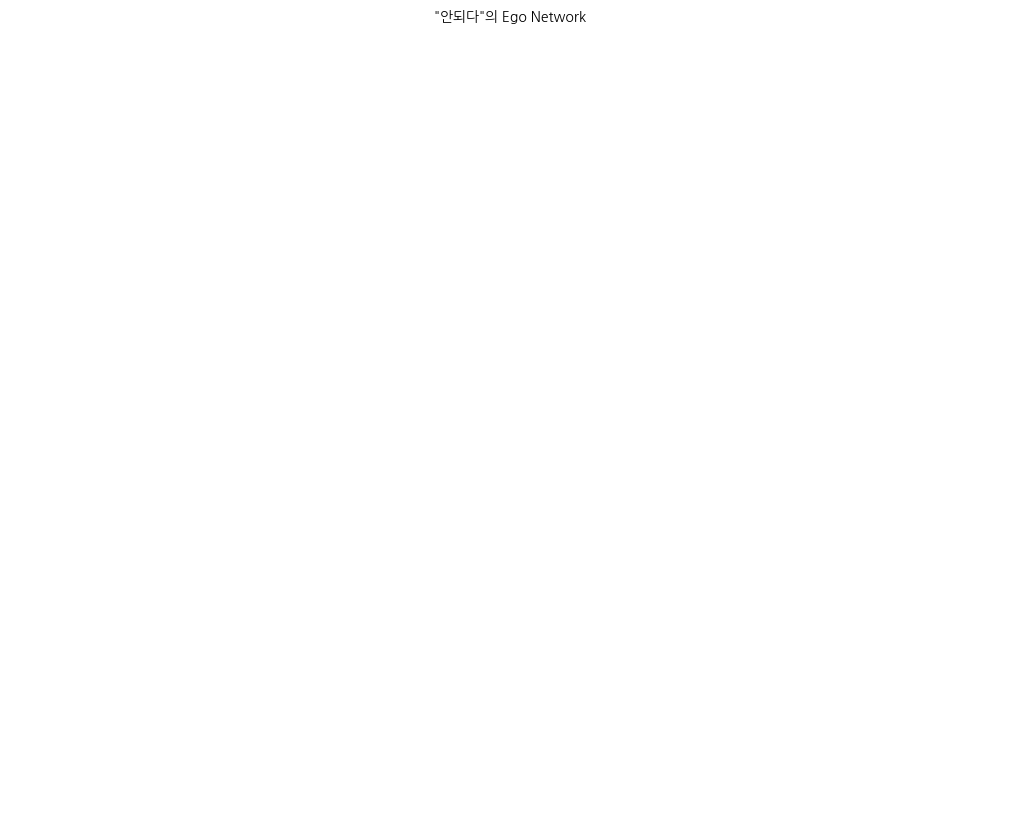

In [26]:
ego_word = '안되다'

ego_network = nx.Graph()

for keywords_list in jayang0['content_keywords']:
    if ego_word in keywords_list:
        for keyword1 in keywords_list:
            if keyword1 in keywords_j0 and keyword1 != ego_word:
                if ego_network.has_edge(ego_word, keyword1):
                    ego_network[ego_word][keyword1]['weight'] += 1
                else:
                    ego_network.add_edge(ego_word, keyword1, weight=1)

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(ego_network) 
nx.draw(ego_network, pos, with_labels=True, node_color='skyblue', node_size=500, edge_color='black', linewidths=1, font_size=10, font_family='NanumGothic')
plt.title(f'"{ego_word}"의 Ego Network', fontproperties=fontprop)
plt.show()


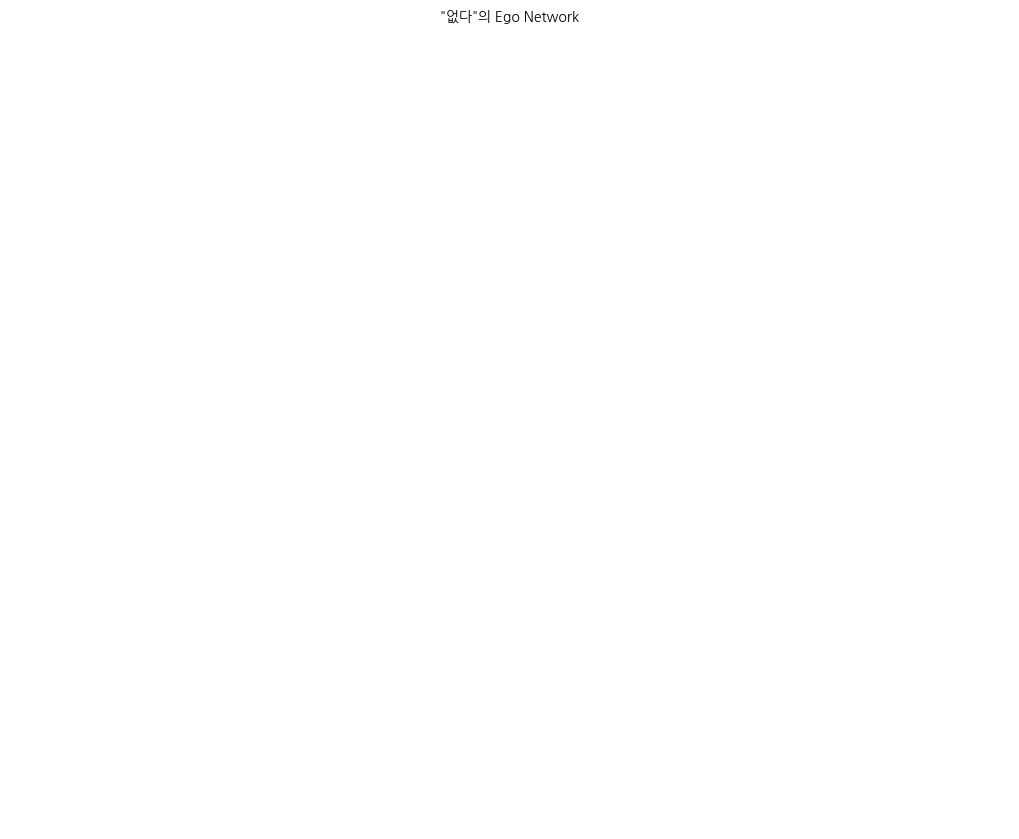

In [27]:
ego_word = '없다'

ego_network = nx.Graph()

for keywords_list in jayang0['content_keywords']:
    if ego_word in keywords_list:
        for keyword1 in keywords_list:
            if keyword1 in keywords_j0 and keyword1 != ego_word:
                if ego_network.has_edge(ego_word, keyword1):
                    ego_network[ego_word][keyword1]['weight'] += 1
                else:
                    ego_network.add_edge(ego_word, keyword1, weight=1)

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(ego_network) 
nx.draw(ego_network, pos, with_labels=True, node_color='skyblue', node_size=500, edge_color='black', linewidths=1, font_size=10, font_family='NanumGothic')
plt.title(f'"{ego_word}"의 Ego Network', fontproperties=fontprop)
plt.show()

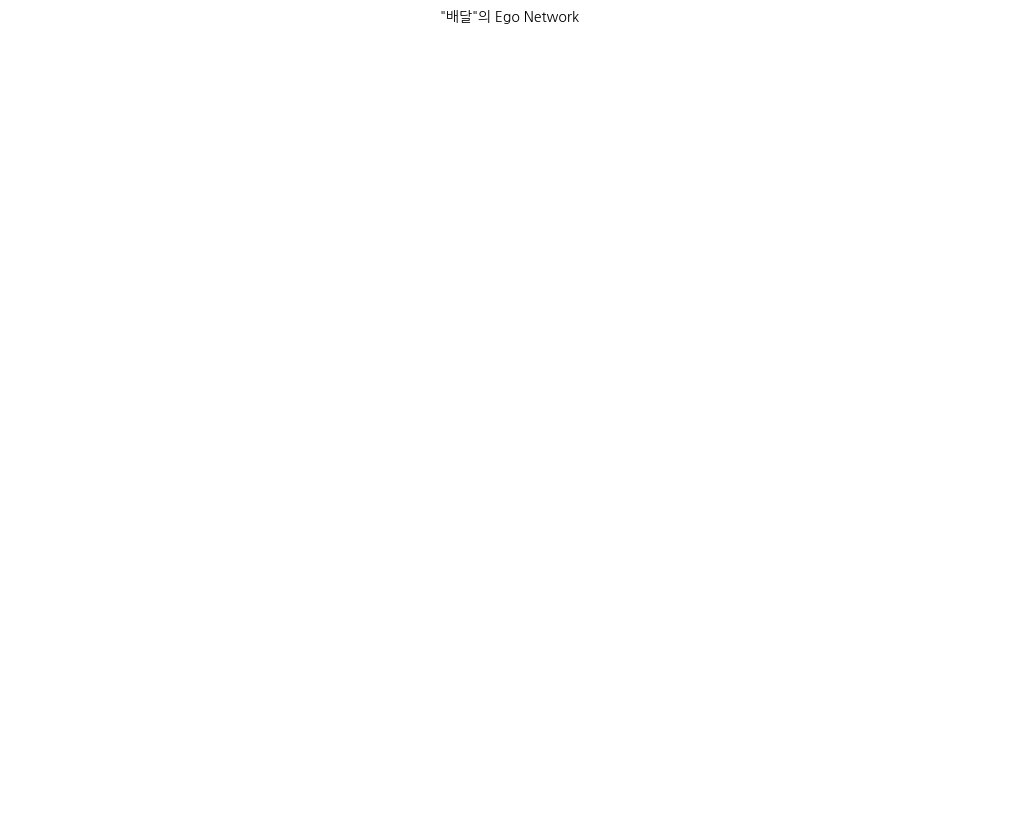

In [28]:
ego_word = '배달'

ego_network = nx.Graph()

for keywords_list in jayang0['content_keywords']:
    if ego_word in keywords_list:
        for keyword1 in keywords_list:
            if keyword1 in keywords_j0 and keyword1 != ego_word:
                if ego_network.has_edge(ego_word, keyword1):
                    ego_network[ego_word][keyword1]['weight'] += 1
                else:
                    ego_network.add_edge(ego_word, keyword1, weight=1)

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(ego_network) 
nx.draw(ego_network, pos, with_labels=True, node_color='skyblue', node_size=500, edge_color='black', linewidths=1, font_size=10, font_family='NanumGothic')
plt.title(f'"{ego_word}"의 Ego Network', fontproperties=fontprop)
plt.show()

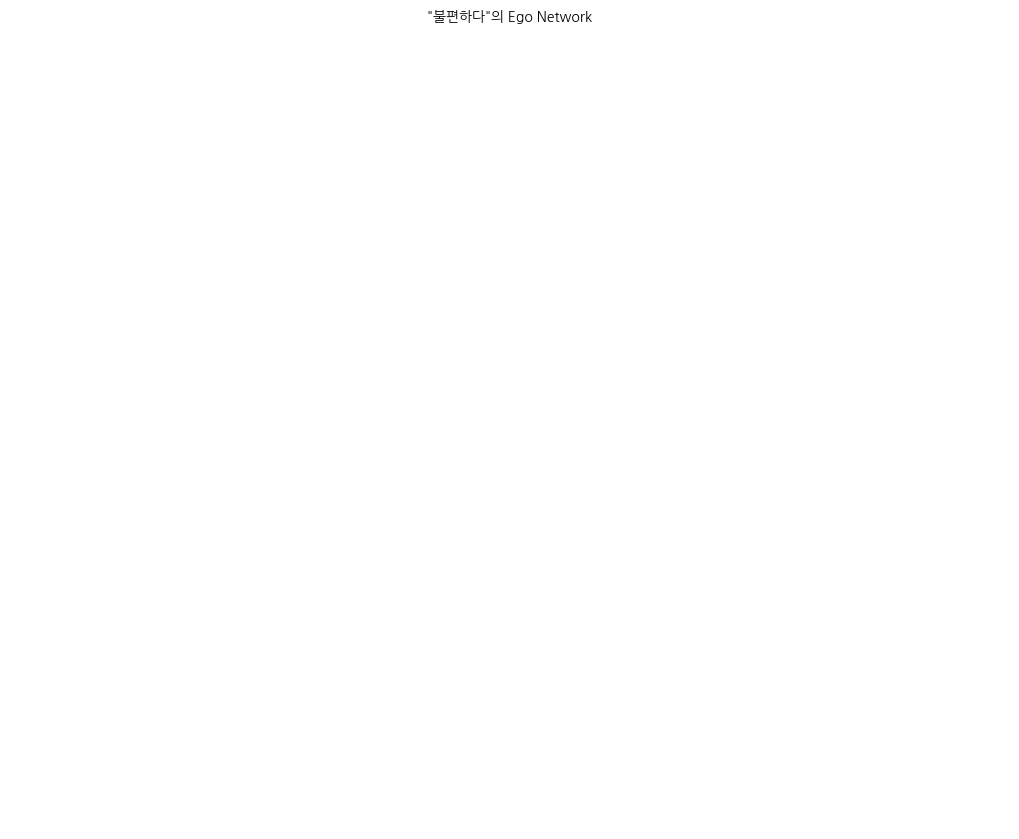

In [29]:
ego_word = '불편하다'

ego_network = nx.Graph()

for keywords_list in jayang0['content_keywords']:
    if ego_word in keywords_list:
        for keyword1 in keywords_list:
            if keyword1 in keywords_j0 and keyword1 != ego_word:
                if ego_network.has_edge(ego_word, keyword1):
                    ego_network[ego_word][keyword1]['weight'] += 1
                else:
                    ego_network.add_edge(ego_word, keyword1, weight=1)

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(ego_network) 
nx.draw(ego_network, pos, with_labels=True, node_color='skyblue', node_size=500, edge_color='black', linewidths=1, font_size=10, font_family='NanumGothic')
plt.title(f'"{ego_word}"의 Ego Network', fontproperties=fontprop)
plt.show()


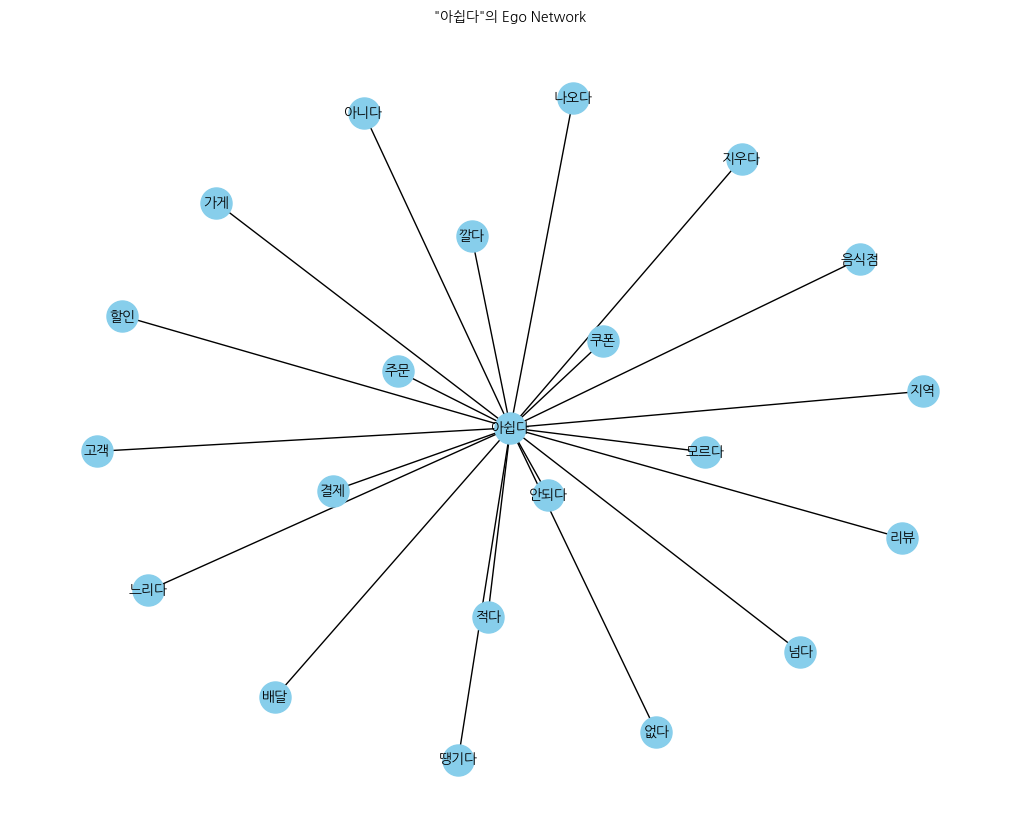

In [27]:
ego_word = '아쉽다'

ego_network = nx.Graph()

for keywords_list in jayang0['content_keywords']:
    if ego_word in keywords_list:
        for keyword1 in keywords_list:
            if keyword1 in keywords_j0 and keyword1 != ego_word:
                if ego_network.has_edge(ego_word, keyword1):
                    ego_network[ego_word][keyword1]['weight'] += 1
                else:
                    ego_network.add_edge(ego_word, keyword1, weight=1)

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(ego_network) 
nx.draw(ego_network, pos, with_labels=True, node_color='skyblue', node_size=500, edge_color='black', linewidths=1, font_size=10, font_family='NanumGothic')
plt.title(f'"{ego_word}"의 Ego Network', fontproperties=fontprop)
plt.show()


### average degree: 네트워크 내 모든 노드 degree의 평균
- 각각의 키워드들이 얼마나 자주 동시 등장하여 해당 네트워크에서 얼마나 영향력 있는지
- 높으면, 핵심 키워드를 중심으로 매우 다양한 관련 키워드들이 나왔다는 의미

### mean distance: 네트워크 내 모든 노드 간 최단 경로 값의 평균
- 2 미만이면 키워드 간 밀접한 관계를 형성
- 값이 작을수록 해당 네트워크 내 변수들이 매우 밀접하게 연결됨을 의미

'아쉽다'는 다른 키워드와 밀접한 관계

In [28]:
# average degree
average_degree = sum(dict(ego_network.degree()).values()) / len(ego_network)

# mean distance
mean_distance = nx.average_shortest_path_length(ego_network)

print(f'average degree of {ego_word}: {average_degree}\nmean distance of {ego_word}: {mean_distance}')

average degree of 아쉽다: 1.9090909090909092
mean distance of 아쉽다: 1.9090909090909092


In [29]:
# 정규화된 연결 중심성: 핵심어

degree_centrality = nx.degree_centrality(G)
total_degree_centrality = sum(degree_centrality.values())
normalized_degree_centrality = {node: centrality / total_degree_centrality for node, centrality in degree_centrality.items()}
s_normalized_degree_centrality = sorted(normalized_degree_centrality.items(), key=lambda x: x[1], reverse=True)

for node, normalized_centrality in s_normalized_degree_centrality:
    print(f"{node}: {normalized_centrality}")

안되다: 0.03801652892561983
쿠폰: 0.03636363636363636
주문: 0.035537190082644624
없다: 0.033884297520661154
아니다: 0.032231404958677684
어플: 0.030578512396694214
배달: 0.029752066115702476
나오다: 0.02892561983471074
가게: 0.028099173553719006
할인: 0.02727272727272727
모르다: 0.0256198347107438
광고: 0.0256198347107438
땡기다: 0.024793388429752067
결제: 0.023966942148760332
느리다: 0.023966942148760332
사용: 0.023966942148760332
적다: 0.022314049586776855
가입: 0.022314049586776855
버리다: 0.022314049586776855
고객: 0.02148760330578512
매장: 0.01983471074380165
오류: 0.01983471074380165
아깝다: 0.019008264462809916
음식점: 0.01818181818181818
개선: 0.01818181818181818
취소: 0.01818181818181818
로그인: 0.01818181818181818
아쉽다: 0.017355371900826446
누르다: 0.017355371900826446
지역: 0.017355371900826446
지우다: 0.017355371900826446
처음: 0.017355371900826446
서버: 0.017355371900826446
접속: 0.01652892561983471
깔다: 0.01652892561983471
서비스: 0.01652892561983471
삭제: 0.015702479338842976
리뷰: 0.015702479338842976
알다: 0.015702479338842976
불편하다: 0.014876033057851238
카드

In [30]:
# 정규화된 매개 중심성: 키워드와 연결된 다른 키워드가 많은 매개 역할을 하는 키워드

betweenness_centrality = nx.betweenness_centrality(G)
total_betweenness_centrality = sum(betweenness_centrality.values())
normalized_betweenness_centrality = {node: centrality / total_betweenness_centrality for node, centrality in betweenness_centrality.items()}
s_normalized_betweenness_centrality = sorted(normalized_betweenness_centrality.items(), key=lambda x: x[1], reverse=True)

for node, normalized_centrality in s_normalized_betweenness_centrality:
    print(f"{node}: {normalized_centrality}")

안되다: 0.08888961971250638
쿠폰: 0.07631719272306257
주문: 0.07393450726791438
없다: 0.06096000025454181
아니다: 0.049963184336491134
어플: 0.04573028568704864
배달: 0.04022704265237362
나오다: 0.0372337894715252
가게: 0.03623806460357038
할인: 0.03564495225128068
광고: 0.03010843028890348
결제: 0.028168567674593064
땡기다: 0.02645118569052539
사용: 0.02615271600059809
모르다: 0.025760282559410246
가입: 0.02445239680855613
느리다: 0.02211149301251145
고객: 0.016879273001416974
적다: 0.015253385886595259
로그인: 0.014897744638895039
버리다: 0.014877943637388799
오류: 0.014499273061675007
누르다: 0.013270932183486439
매장: 0.012190415662069874
아깝다: 0.011717902185013953
서버: 0.011224673420505446
지우다: 0.010152613656463408
접속: 0.010064410821476168
깔다: 0.009043109865916612
음식점: 0.009020978216933824
처음: 0.009010561135792032
지역: 0.008458062751239842
개선: 0.008373932122435462
카드: 0.007898485391688555
서비스: 0.007794481516512259
취소: 0.007372371027360249
아쉽다: 0.006966622032166894
불편하다: 0.006614764742512748
삭제: 0.0063707097447691895
리뷰: 0.00634431439924774

In [31]:
# 근접 중심성
closeness_centrality = nx.closeness_centrality(G)

for node, centrality in sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True):
    print(f"{node}: {centrality}")

안되다: 1.0
쿠폰: 0.9583333333333334
주문: 0.9387755102040817
없다: 0.9019607843137255
아니다: 0.8679245283018868
어플: 0.8363636363636363
배달: 0.8214285714285714
나오다: 0.8070175438596491
가게: 0.7931034482758621
할인: 0.7796610169491526
모르다: 0.7540983606557377
광고: 0.7540983606557377
땡기다: 0.7419354838709677
결제: 0.7301587301587301
느리다: 0.7301587301587301
사용: 0.7301587301587301
적다: 0.7076923076923077
가입: 0.7076923076923077
버리다: 0.7076923076923077
고객: 0.696969696969697
매장: 0.6764705882352942
오류: 0.6764705882352942
아깝다: 0.6666666666666666
음식점: 0.6571428571428571
개선: 0.6571428571428571
취소: 0.6571428571428571
로그인: 0.6571428571428571
아쉽다: 0.647887323943662
누르다: 0.647887323943662
지역: 0.647887323943662
지우다: 0.647887323943662
처음: 0.647887323943662
서버: 0.647887323943662
접속: 0.6388888888888888
깔다: 0.6388888888888888
서비스: 0.6388888888888888
삭제: 0.6301369863013698
리뷰: 0.6301369863013698
알다: 0.6301369863013698
불편하다: 0.6216216216216216
카드: 0.6216216216216216
비싸다: 0.6216216216216216
네트워크: 0.6133333333333333
넘다: 0.61333333

In [32]:
# '안되다'와 연결된 노드 검색
target_word = '안되다'
neighbors = list(G.neighbors(target_word))

print("'%s'와 연결된 단어:" % target_word)
for neighbor in neighbors:
    print(neighbor)


'안되다'와 연결된 단어:
쿠폰
땡기다
아쉽다
가게
적다
누르다
할인
주문
모르다
취소
아니다
삭제
느리다
로그인
매장
넘다
사용
배달
어플
오류
버리다
비싸다
지우다
결제
나오다
개선
실행
음식점
접속
없다
고객
광고
네트워크
알다
처음
서버
아깝다
쓰레기
서비스
깔다
리뷰
불편하다
지역
가입
전화
카드


In [34]:
# '안되다'와 연결된 노드 검색
target_word = '배달'
neighbors = list(G.neighbors(target_word))

print("'%s'와 연결된 단어:" % target_word)
for neighbor in neighbors:
    print(neighbor)

'배달'와 연결된 단어:
할인
가게
불편하다
땡기다
주문
취소
없다
비싸다
결제
사용
지역
안되다
쿠폰
아니다
느리다
모르다
광고
깔다
매장
적다
오류
고객
음식점
서비스
리뷰
넘다
버리다
아깝다
어플
개선
지우다
카드
아쉽다
나오다
삭제
쓰레기
